In [2]:
import pandas as pd
drinks = pd.read_csv('drinks.csv')
drinks.info

<bound method DataFrame.info of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  
0                             0.0        AS  
1                             4.9        EU  
2                        

In [3]:
drinks.head

<bound method NDFrame.head of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  
0                             0.0        AS  
1                             4.9        EU  
2                          

In [4]:
# 피처 상관관계
# 피어스 상관계수 
# 'beer_serving', 'wine_servings'
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr



,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
corr = drinks[['beer_servings','spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


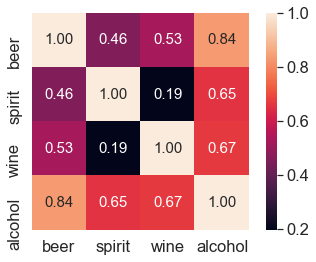

In [6]:
# 상관계수 시각화
import matplotlib.pyplot as plt
import seaborn as sns
cols_view = ['beer','spirit', 'wine', 'alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values, cbar = True, annot = True, square=True,
                fmt = '.2f', annot_kws = {'size':15},
                yticklabels = cols_view, xticklabels = cols_view)
plt.show()

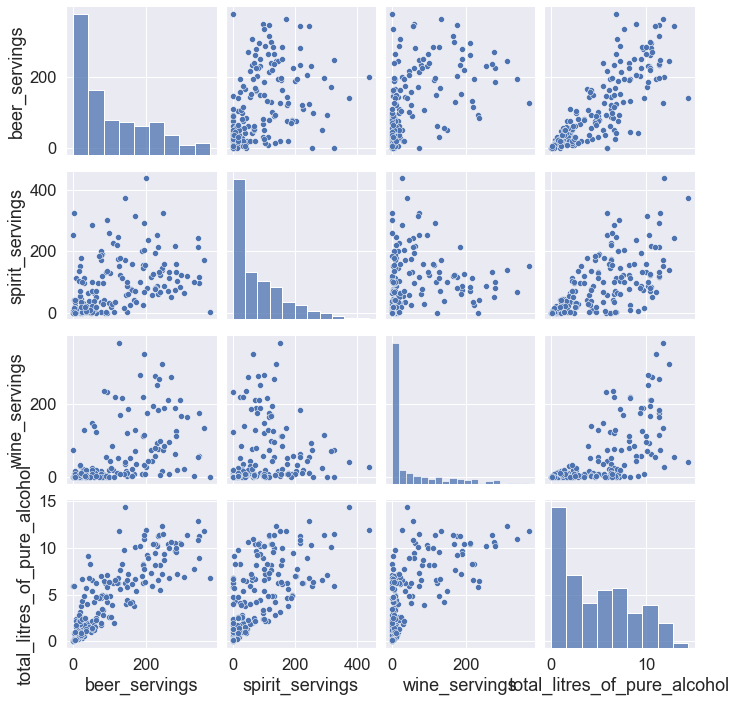

In [7]:
hm = sns.pairplot(drinks)
plt.show()

In [8]:
drinks.isnull().sum()
# drinks.info()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [9]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [10]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [11]:
# 대륙별 국가수 출력
print(drinks.groupby('continent').count()['country'])

continent
AF    53
AS    44
EU    45
OC    16
OT    23
SA    12
Name: country, dtype: int64


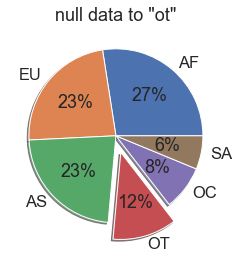

In [24]:
plt.pie(drinks['continent'].value_counts(),
        labels = drinks['continent'].value_counts().index.tolist(),
       autopct='%.0f%%',
       explode = (0,0,0,0.2,0,0),
       shadow=True)
plt.title('null data to "ot"')
plt.show()

In [30]:
drinks.groupby('continent')['spirit_servings'].max()

continent
AF    152
AS    326
EU    373
OC    254
OT    438
SA    302
Name: spirit_servings, dtype: int64

In [31]:
drinks.groupby('continent')['spirit_servings'].mean()

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [32]:
drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [43]:
dm = drinks['total_litres_of_pure_alcohol'].mean()
con_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_mean[con_mean >= dm]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [52]:
dmax = drinks.groupby('continent')['beer_servings'].mean()
dmax[dmax == dmax.max()]

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [54]:
drinks.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

In [62]:
import numpy as np
results = drinks.groupby('continent')['beer_servings'].agg(['mean', 'min', 'max', 'sum']
means = results['mean'].tolist() 
mins = results['min'].tolist() 
maxs = results['max'].tolist()  
sums = results['sum'].tolist()                                                            
index = np.arange(len(results.index))
bar_width = 0.1
rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index, sums, bar_width, color = 'y', label = 'Sum')
plt.xticks(index, result.index.tolist())
plt.                                                           

SyntaxError: invalid syntax (<ipython-input-62-e1bd7b04d055>, line 3)

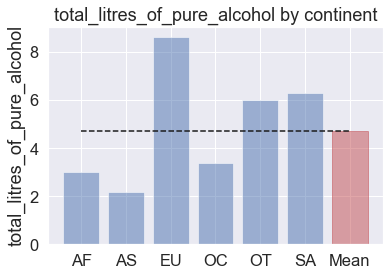

In [67]:
import numpy as np
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
total_mean = drinks.total_litres_of_pure_alcohol.mean()

continents = continent_mean.index.tolist()
continents.append('Mean')

x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by continent')
plt.show()

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64


ValueError: ' center' is not a valid value for align; supported values are 'center', 'edge'

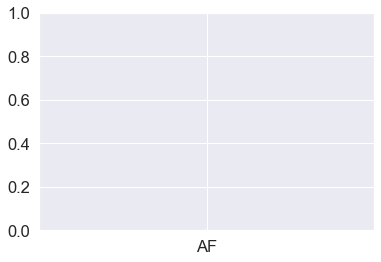

In [74]:
print(drinks.groupby('continent')['beer_servings'].sum())
beer_sum = drinks.groupby('continent')['beer_servings'].sum()
plt.bar(beer_sum.index, beer_sum, align = ' center', alpha = 0.5)

In [73]:
drinks.groupby('continent')['beer_servings'].sum().index.tolist()

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [75]:
from scipy import stats


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
df = pd.read_csv('auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year','origin', 'name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


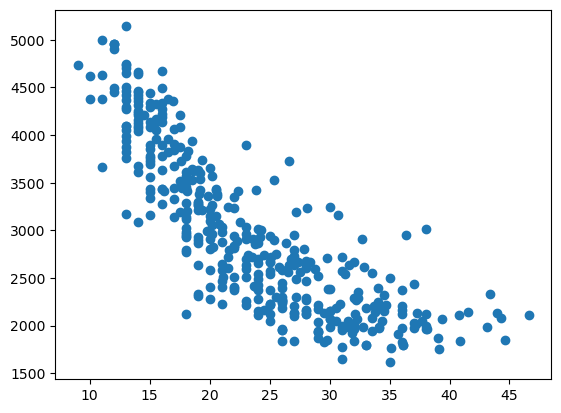

In [80]:
plt.scatter(x = 'mpg', y = 'weight', data = df)